### Section 2G: Geospatial Analysis

Graph the data by region in order to understand which counties (visually) had the greatest drop in Enrollment.

In [1]:
#load libraries needed for the notebook
library(dplyr)
library(tidyr)
library(ggplot2)
library(maps)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
#Load in the dataframe from our saved .Rda file
df <- readRDS(file="Group7DataFrame.Rda")

In [3]:
#Load in the county_total_2021 dataframe from our saved .Rda file
county_total_2021 <- readRDS(file="county_total_2021.Rda")

In [4]:
#Load in the map data
ca_map <- map_data("county","california")
ca_map <- ca_map[ ,-5]
names(ca_map)[5] <- 'region'

# make the county names lowercase
caco <- mutate(county_total_2021, region = tolower(COUNTY))
head(caco)

COUNTY,Year,total_enroll,percent_change,rank_2021,region
<fct>,<fct>,<int>,<dbl>,<int>,<chr>
Alpine,2021,73,4.2857143,1,alpine
Sutter,2021,23695,1.6603741,2,sutter
Lassen,2021,3837,0.6822356,3,lassen
Glenn,2021,6073,0.5130751,4,glenn
Trinity,2021,1585,0.3799873,5,trinity
San Joaquin,2021,151167,-0.7765015,6,san joaquin


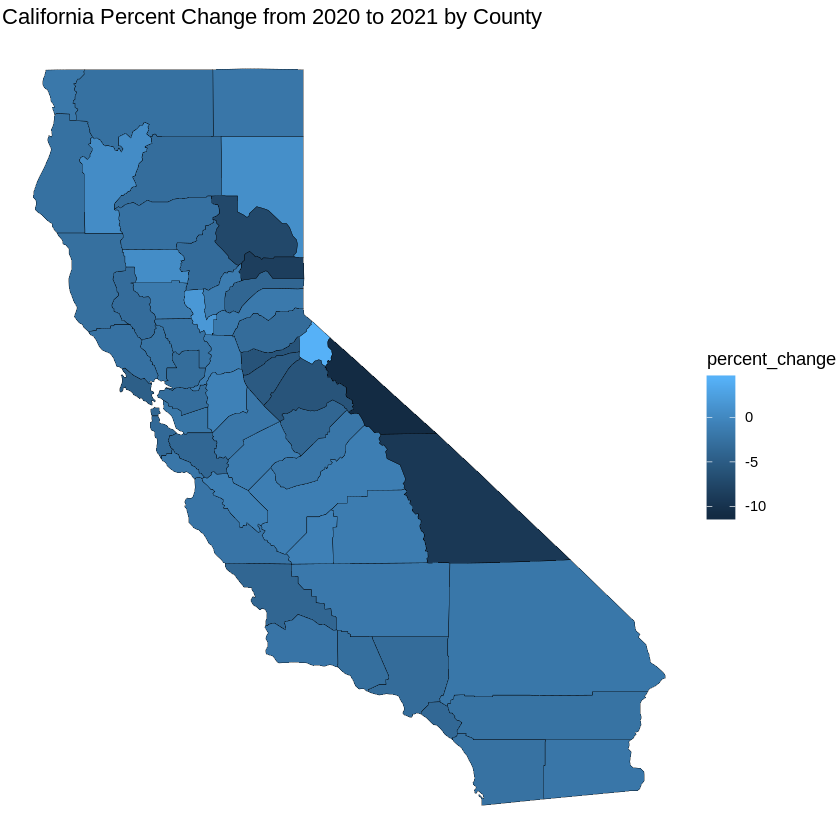

In [5]:
# Define the filling attribute with the data frame 
ggplot(data = caco, aes(fill = percent_change)) +

# Define the map with the common id 
geom_map(map=ca_map, aes(map_id = region), color='black', size=.1)+

# Map the data
expand_limits(x = ca_map$long, y = ca_map$lat) +
coord_map() + 
theme_void()  +
labs(title="California Percent Change from 2020 to 2021 by County")

Now show geospatially the different counties, but only for one Ethnic demographic (plot the top three highest in numbers)

In [6]:
#Breakdown the dataframe into just one ethnicity, and then repeat steps above
Geospatial_Graph <- df %>%
filter(ETHNIC == 2) %>%
select(COUNTY, Year, ENR_TOTAL) %>%
group_by(COUNTY, Year)  %>% 
summarize(Total_Enroll = sum(ENR_TOTAL)) %>%
mutate(Percent_Change = (Total_Enroll/lag(Total_Enroll)-1)*100)
Geo_Graph_Explore_2021 = Geospatial_Graph %>% filter(Year == 2021)
#Geo_Graph_Explore_2021
caco_Asian <- mutate(Geo_Graph_Explore_2021, region = tolower(COUNTY))


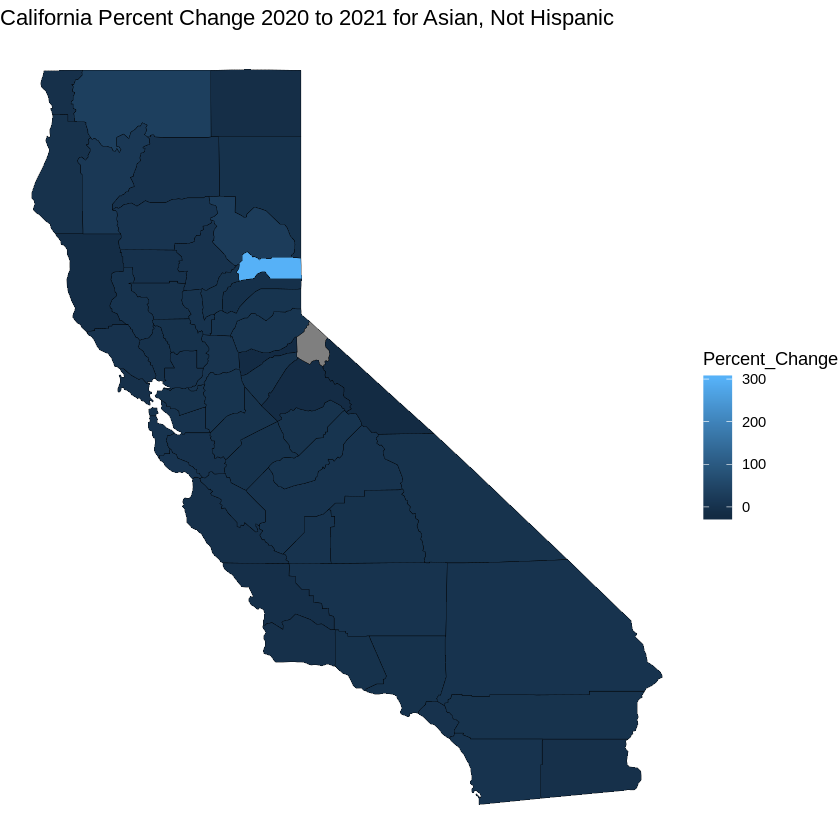

In [7]:
# Define the filling attribute with the data frame 
ggplot(data = caco_Asian, aes(fill = Percent_Change)) +

# Define the map with the common id 
geom_map(map=ca_map, aes(map_id = region), color='black', size=.1)+

# map the data
expand_limits(x = ca_map$long, y = ca_map$lat) +
coord_map() + 
theme_void() +
labs(title="California Percent Change 2020 to 2021 for Asian, Not Hispanic")

In [8]:
#Breakdown the dataframe into just one ethnicity, and then repeat steps above

Geospatial_Graph <- df %>%
filter(ETHNIC == 7) %>%
select(COUNTY, Year, ENR_TOTAL) %>%
group_by(COUNTY, Year)  %>% 
summarize(Total_Enroll = sum(ENR_TOTAL)) %>%
mutate(Percent_Change = (Total_Enroll/lag(Total_Enroll)-1)*100)
Geo_Graph_Explore_2021 = Geospatial_Graph %>% filter(Year == 2021)
caco_White <- mutate(Geo_Graph_Explore_2021, region = tolower(COUNTY))

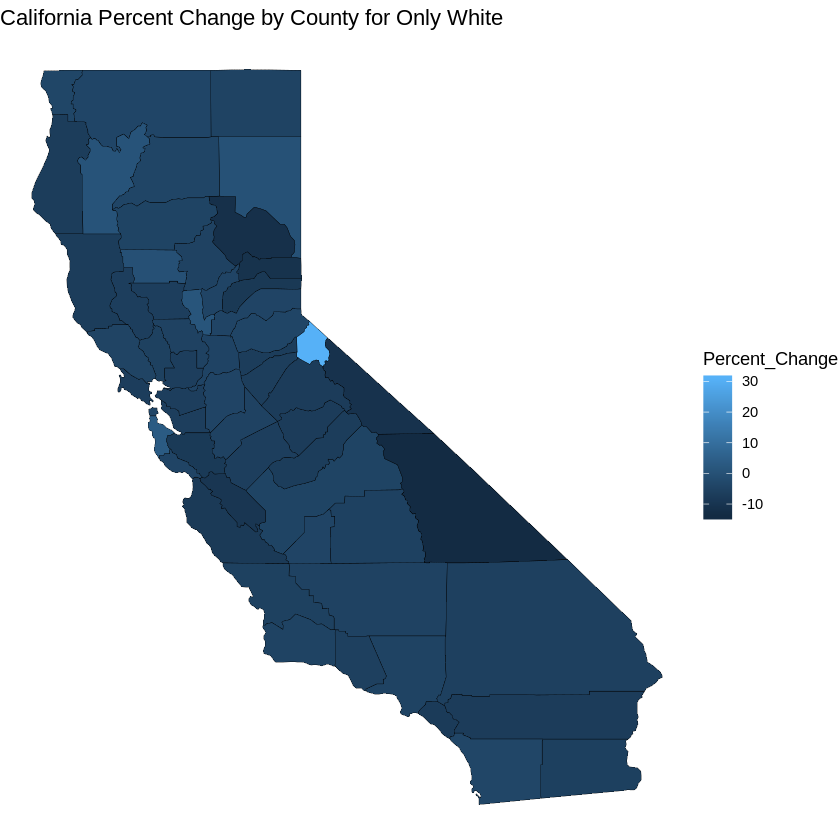

In [9]:
# Define the filling attribute with the data frame 
ggplot(data = caco_White, aes(fill = Percent_Change, )) +

# Define the map with the common id 
geom_map(map=ca_map, aes(map_id = region), color='black', size=.1)+

# map the data
expand_limits(x = ca_map$long, y = ca_map$lat) +
coord_map() + 
theme_void() +
labs(title="California Percent Change by County for Only White")

In [10]:
#Breakdown the dataframe into just one ethnicity, and then repeat steps above

Geospatial_Graph <- df %>%
filter(ETHNIC == 5) %>%
select(COUNTY, Year, ENR_TOTAL) %>%
group_by(COUNTY, Year)  %>% 
summarize(Total_Enroll = sum(ENR_TOTAL)) %>%
mutate(Percent_Change = (Total_Enroll/lag(Total_Enroll)-1)*100)
Geo_Graph_Explore_2021 = Geospatial_Graph %>% filter(Year == 2021)
caco_Hispanic <- mutate(Geo_Graph_Explore_2021, region = tolower(COUNTY))

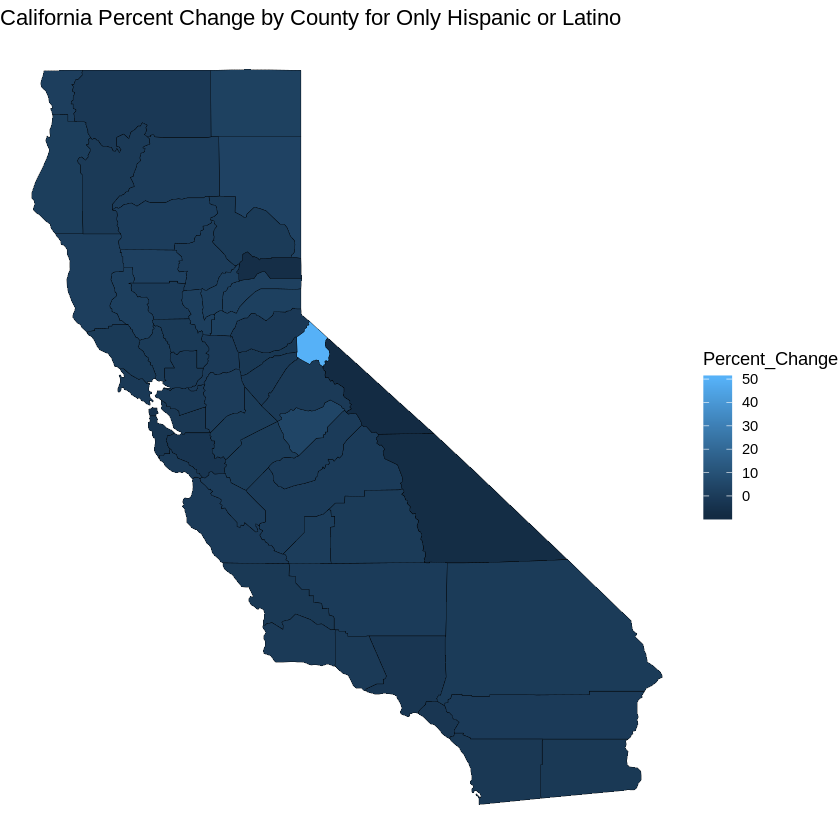

In [11]:
# Define the filling attribute with the data frame 
ggplot(data = caco_Hispanic, aes(fill = Percent_Change, )) +

# define the map with the common id 
geom_map(map=ca_map, aes(map_id = region), color='black', size=.1)+

# Map the data
expand_limits(x = ca_map$long, y = ca_map$lat) +
coord_map() + 
theme_void() +
labs(title="California Percent Change by County for Only Hispanic or Latino")

Findings: The Asian population and Hispanic population both grew in most counties, while White populations dropped. However, both White and Hispanic grew in one specific county, which is also reflected as the same county that grew overall

In [13]:
#Save our dataframe to an Rda file
saveRDS(df,file="Group7DataFrame.Rda")